<div class="alert alert-block alert-success">
    

# 🌀Clustering
    
   
 👨‍🏫 **Vikesh K**      
 📓 **Lab-10**
  
  

</div>

 💡  <span style='font-family:Georgia'>
    <font color= darkred> **"Learn as if you will live forever, live like you will die tomorrow."**
    </font> 💡   


## 📝 Lab Agenda 
    
We will cover:

* Basics of Clustering
* Case Study


  
## Clustering Overview

* Partitions the data into mutually exclusive groups (clusters)
* Group of objects that are **similar to each other** in the cluster, and **dissimilar to data points** in other clusters

### Difference between Clustering and Classification

* In Classification, we have already labelled the dataset to a category. For example, we can divide our customers on the basis of gender, demographics etc.

* In clustering, we don't do any labeling on the data, instead we pass it through a ML model and let it discover clusters in the dataset

### Why Clustering?

* Exploratory data analysis- helps you to quickly see patterns in data
* Outlier Detection - the outliers will form a separate group from the rest
* Pre-processing step for predictions - Many predictions are more accurate after doing it for clusters

### Clustering Algos

* **Partion based** - `K-means` - efficient to deal with and are used for medium and large sized daatsets

* **Hierarchial** - `Hierarchical clustering` - produce trees of clusters; generally good for small sized datasets

### Clustering Applications

* **Retail**-
    * Identify the buying patterns of customers and generate profiles.
    * Can also be used in recommendation systems to club togther similar items or users

* **Banking** -
    * Fraud detection; normal usage clusters vs suspicious usage clusters
    * Customer segmentation

* **Insurance**
    * Fraud detection

* **Media** - Automatically categorise news based on their content

* **Genetics** - Clustering genetic markers to indetify ties
    
![clustering2.png](attachment:clustering2.png)

source: dataflair


#### [Visualise K- Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)



## Data load and inspect

We are using an a very simple data to focus on the process and method rather than data complications. Data is taken from the book ML using Python

In [1]:
## libraries
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing
from sklearn.preprocessing import StandardScaler

# K-Means cluster
from sklearn.cluster import KMeans

# for ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading the datasets
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/customerspends.csv'

df = pd.read_csv(url)

#### Inspect the data

In [3]:
# how to get the shape of the data
print(df.shape)

# How to get the column data types
print(df.info())

# how to check for few initial rows
display(df.head())

(20, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer               20 non-null     int64  
 1   Apparel                20 non-null     float64
 2   Beauty and Healthcare  20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes
None


,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


In [4]:
# missing values
df.isna().sum()

Customer                 0
Apparel                  0
Beauty and Healthcare    0
dtype: int64

**Since the Customer column is only for identification. We will recast it as an index**

In [5]:
df = df.set_index("Customer")

### EDA



In [6]:
df.describe()

,Apparel,Beauty and Healthcare
count,20.000000,20.000000
mean,13.463000,9.788000
std,8.780425,7.359884
min,4.250000,0.700000
25%,5.895000,2.725000
50%,13.575000,7.750000
75%,16.697500,16.575000
max,31.100000,21.500000


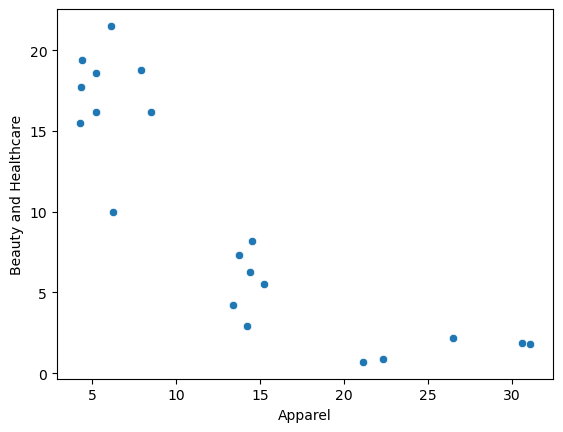

In [7]:
sns.scatterplot(data = df, x = "Apparel", y = "Beauty and Healthcare");

## Pre-processing : Scaling the data

In [8]:
df_scaled = df.copy()

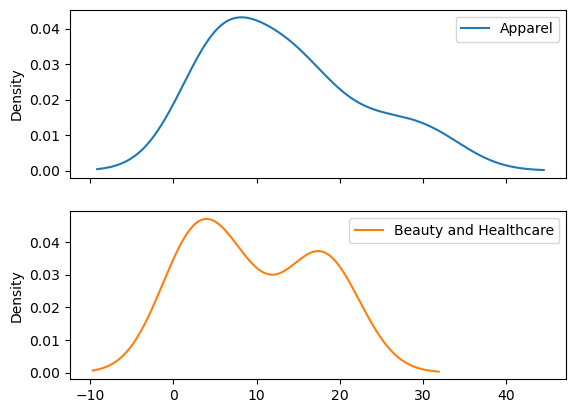

In [9]:
df_scaled.plot(kind = "kde", subplots = True);

In [10]:
# launching the scaler
scaler = StandardScaler()

# do the fit transform
df_scaled[['Apparel', "Beauty and Healthcare"]] = scaler.fit_transform(df_scaled[['Apparel', "Beauty and Healthcare"]])

**As the two columns were roughly on the same scale, there was not much difference post scaling**

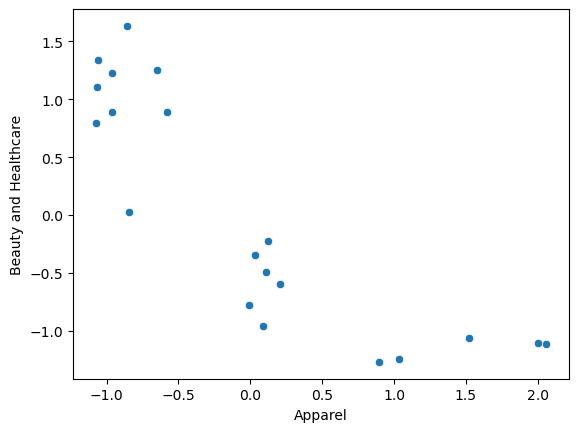

In [11]:
sns.scatterplot(data = df_scaled, x = "Apparel", y = "Beauty and Healthcare");

## Clustering

In [12]:
# # how many cluster do we want?
clusterNum = 3

# Method we are using?
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, random_state = 123)

# ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

# fit the model
k_means.fit(df_scaled)

# get the labels from the model
labels = k_means.labels_

# Inertia value of k-means
print("interia: " + str(k_means.inertia_))

print(labels)

interia: 3.4439355377696597
[2 1 0 2 0 1 0 2 0 1 0 1 0 0 2 0 1 2 1 1]


**You can also get the cluster centres**

In [13]:
k_means.cluster_centers_

array([[-0.9022739 ,  1.14302204],
       [-0.04191518, -0.48105443],
       [ 1.50231949, -1.15535907]])

**The cluster centre values are scaled. If we want to show them in the original plot, we would need to scale back the data to  original levels and use that**

In [14]:
rescaled_centres = scaler.inverse_transform(k_means.cluster_centers_)

In [15]:
cc_pd = pd.DataFrame(rescaled_centres, columns=['apparel_center', 'beauty_center'])
cc_pd

,apparel_center,beauty_center
0,5.741250,17.987500
1,13.104286,6.337143
2,26.320000,1.500000


**Assigning back the cluster info to the dataset**

In [16]:
# adding the labels as a column back to the dataset
df["cluster"] = labels
df.head(5)

,Apparel,Beauty and Healthcare,cluster
Customer,,,
1,21.10,0.7,2
2,15.23,5.5,1
3,5.22,18.6,0
4,31.10,1.8,2
5,6.12,21.5,0


**Check the mean values by each cluster group**

In [17]:
# check the mean for all the values
df.groupby("cluster").agg(["mean", "median", "std"]).round(2)

Apparel              Beauty and Healthcare             
           mean median   std                  mean median   std
cluster                                                        
0          5.74   5.21  1.65                 17.99  18.15  2.00
1         13.10  14.20  3.08                  6.34   6.28  2.41
2         26.32  26.50  4.60                  1.50   1.80  0.66

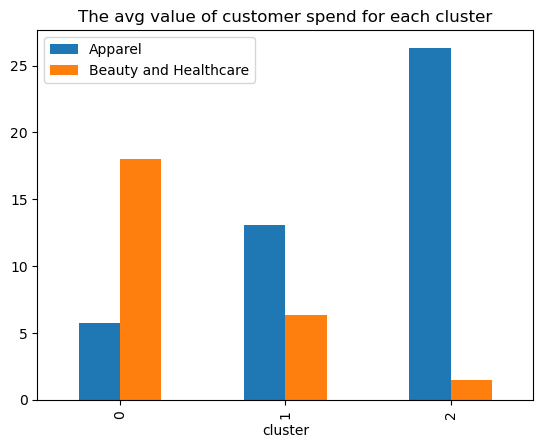

In [18]:
# check the mean for all the values
df.groupby("cluster").mean().round(2).plot(kind = "bar", title = "The avg value of customer spend for each cluster");

**Plotting the difference between age and Income**

We will use two different chart types in seaborn to plot it

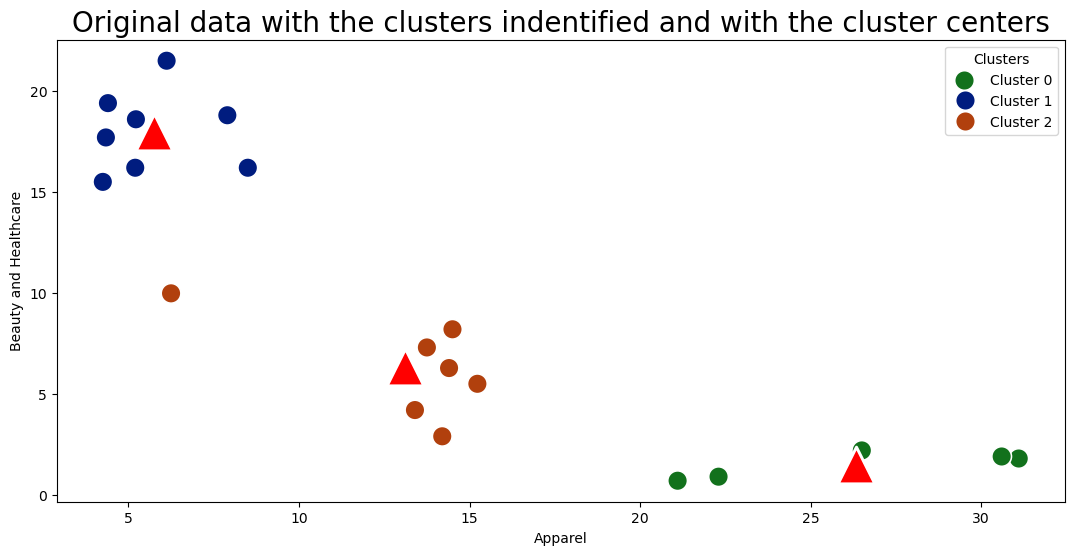

In [19]:
# plot size
plt.figure(figsize = (13,6))
sns.scatterplot(data = df, x = "Apparel", y = "Beauty and Healthcare", hue = "cluster", palette = "dark", s = 200);

sns.scatterplot(x = "apparel_center", y = "beauty_center", data = cc_pd, s=700, marker='^', color='red');

legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2"]
plt.legend(title="Clusters", labels=legend_labels)
plt.title("Original data with the clusters indentified and with the cluster centers", fontsize = 20);

**Alternative way**

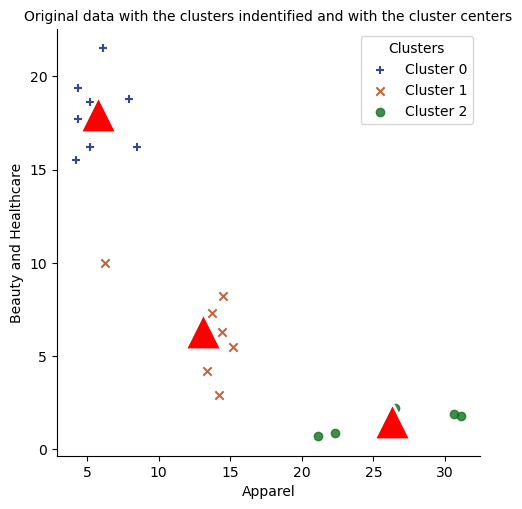

In [20]:
# plot size
markers = ["+", "x", "o"]

sns.lmplot(data = df, x = "Apparel", y = "Beauty and Healthcare", hue = "cluster"
           , palette = "dark",  markers = markers, fit_reg = False, legend = False);

sns.scatterplot(x = "apparel_center", y = "beauty_center", data = cc_pd, s=700, marker='^', color='red');

legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2"]
plt.legend(title="Clusters", labels=legend_labels);
plt.title("Original data with the clusters indentified and with the cluster centers", fontsize = 10);

<div class="alert alert-info" role="alert">
    
**Note**

In the above `seaborn` command, we are using `palette = "dark"` argument. You should have the >=0.11 version of the seaborn to run this succesfully.

```py
# check your seaborn version
print(sns.__version__)

# if your version is not latest run the below command
!pip install seaborn --upgrade
```
</div>

## Right value of K?

### Elbow method

The Elbow Method is a graphical representation used to find the optimal number of clusters in a dataset. It is a heuristic method that helps determine the number of clusters by plotting the explained variation as a function of the number of clusters. 

The method only uses intra-cluster distances and is easy to implement, but it can be subjective and unreliable, especially for datasets with complex structures.

In [21]:
k_values = range(2,6)

In [22]:
inertia_values = []

for k in range(2,6):

    # Method we are using?
    k_means = KMeans(init = "k-means++", n_clusters = k, random_state = 123)

    # fit the model
    k_means.fit(df_scaled)
    
    # print(k_means.labels_)

    # get the labels from the model
    inertia_values.append(k_means.inertia_)


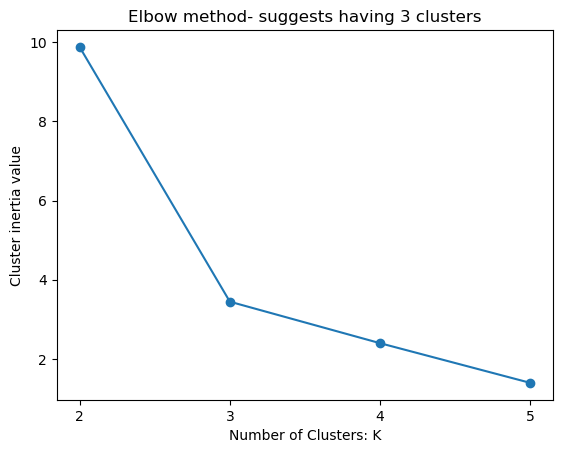

In [23]:
plt.plot(k_values, inertia_values, marker = "o");

plt.xlabel("Number of Clusters: K")
plt.ylabel("Cluster inertia value")
plt.title("Elbow method- suggests having 3 clusters")
plt.xticks([2,3,4,5]);

## Silhouette Score

Silhouette Score measures how well a data point fits into its own cluster compared to other clusters, using both intra-cluster and inter-cluster distances 

The score ranges from -1 to +1, where a high positive value indicates that the data point is well-clustered and distinctly separated from other clusters, suggesting a meaningful clustering result. 

A negative score implies that the data point may be assigned to the wrong cluster. A score close to 0 indicates that the data point is on or very close to the decision boundary between clusters, suggesting that the clustering is not well-defined and can be ambiguous

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_scores = []

for k in range(2,6):

    # Method we are using?
    k_means = KMeans(init = "k-means++", n_clusters = k, random_state = 123)

    # fit the model
    k_means.fit(df_scaled)
    
    # print(k_means.labels_)

    # get the labels from the model
    silhouette_scores.append(silhouette_score(df_scaled, k_means.labels_))

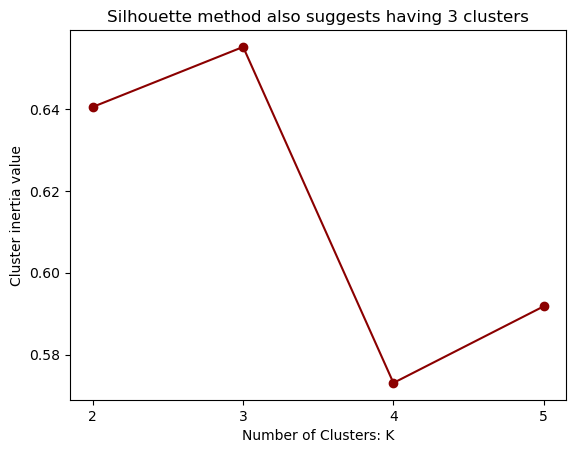

In [26]:
plt.plot(k_values, silhouette_scores, marker = "o", color = "darkred");

plt.xlabel("Number of Clusters: K")
plt.ylabel("Cluster inertia value")
plt.title("Silhouette method also suggests having 3 clusters")
plt.xticks([2,3,4,5]);

### Dendograms

This method is not used a lot, however good to be aware about it. 

Dendograms is a cluster tree diagram that groups those entities together that are nearer to each other. Seaborn's `clustermap()` allows us to draw the dendograms.

You need to focus on the tree on the left of the dendogram. They show how the values are clubbed togther and which one is closer to each other. 

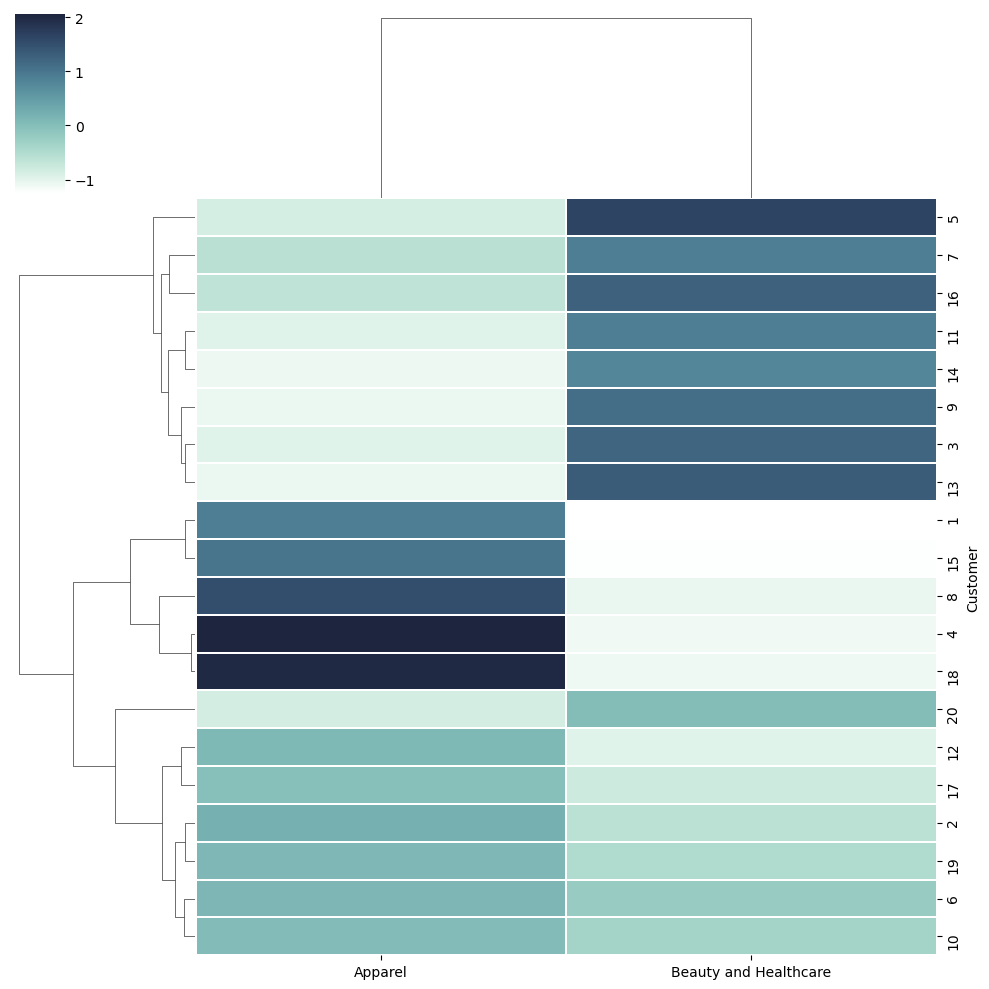

In [27]:
cmap = sns.cubehelix_palette(as_cmap = True, rot = -.3, light = 1)
sns.clustermap(df_scaled, cmap = cmap, linewidth = .2);

## Hierarchial Clustering

It creates a tree of clusters known as a dendrogram, where the root is the single cluster containing all the data points, and the leaves are the individual data points.

It does not require the number of clusters to be specified in advance, and the number of clusters can be determined by interpreting the dendrogram.

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# for plotting dendogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [29]:
# calling the model
hie_clust = AgglomerativeClustering(n_clusters = None, distance_threshold=0)

# applying the model
hie_clust.fit(df_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

**Plot the top three levels of the dendrogram**


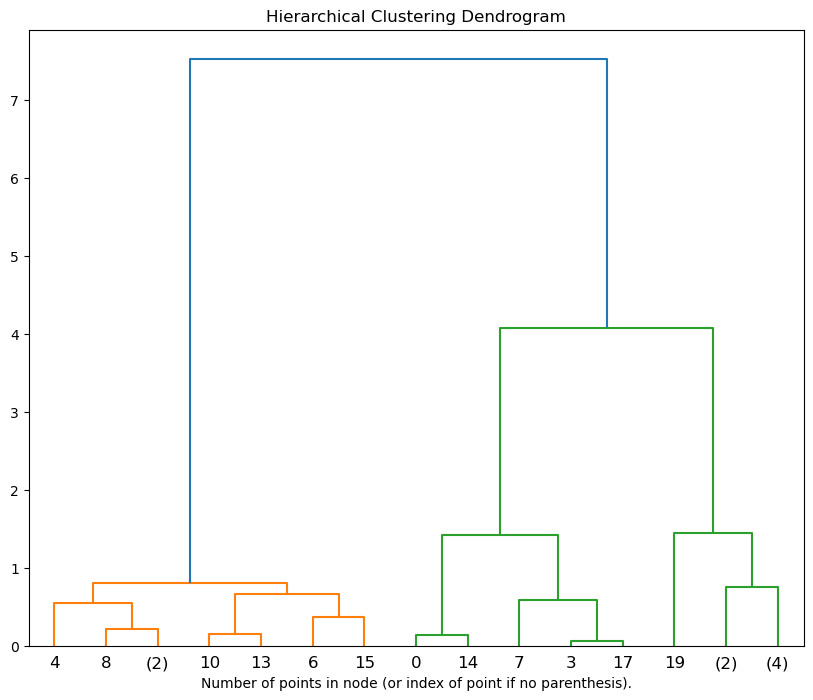

In [30]:
plt.figure(figsize = (10, 8))

plot_dendrogram(hie_clust, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.title('Hierarchical Clustering Dendrogram')

plt.show()

## 📚 Reference material 


* [K-Means clustering](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a)

* [Feature scaling with `scikit-learn`](http://benalexkeen.com/feature-scaling-with-scikit-learn/)

* [`scikit-learn` all types of pre-processing](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

* [Plot Hierachial clustering dendograms in Python](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

